In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/COSC_757_Project/NYPD_Calls_Cleaned_Data.csv')

In [ ]:
data.head()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude,Cluster,Cluster_Label,RESPONSE_TS,INCIDENT_HOUR
0,91250176,2023-01-01,2022-12-31,23:24:39,67.0,2,vehicle accident injury,1,2023-01-01 01:08:21,2023-01-01 01:09:57,2023-01-01 01:09:57,2023-01-01 01:57:44,40.649730,-73.936475,8,Directed Patrols and Inspections,0.000098,23
1,91250180,2023-01-01,2022-12-31,23:24:47,75.0,2,alarms commercialburglary,1,2023-01-01 00:38:00,2023-01-01 00:38:34,2023-01-01 00:44:33,2023-01-01 01:45:21,40.662817,-73.881221,6,Burglary Alarms,0.000402,23
2,91250681,2023-01-01,2022-12-31,23:55:56,114.0,4,alarms residentialburglary,1,2023-01-01 00:01:26,2023-01-01 00:06:18,2023-01-01 00:06:18,2023-01-01 00:06:27,40.762587,-73.912199,6,Burglary Alarms,0.000299,23
3,91250683,2023-01-01,2022-12-31,23:55:59,66.0,2,alarms residentialburglary,1,2023-01-01 00:01:34,2023-01-01 00:37:14,2023-01-01 01:09:32,2023-01-01 01:21:14,40.610729,-73.967644,6,Burglary Alarms,0.004174,23
4,91250700,2023-01-01,2022-12-31,23:57:08,115.0,4,alarms commercialburglary,1,2023-01-01 00:01:29,2023-01-01 00:14:28,2023-01-01 00:21:59,2023-01-01 01:24:22,40.748119,-73.891679,6,Burglary Alarms,0.001259,23


In [ ]:
'''
# Extract day of week from INCIDENT_DATE
data['INCIDENT_DATE'] = pd.to_datetime(data['INCIDENT_DATE'])
data['INCIDENT_WEEKDAY'] = data['INCIDENT_DATE'].dt.dayofweek

# Example model features and target
features = data[['INCIDENT_WEEKDAY', 'NYPD_PCT_CD', 'BORO_NM', 'RESPONSE_TS']]
target = data['INCIDENT_HOUR']
'''

In [ ]:
'''# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the testing set
predictions = rf.predict(X_test)

# Display a few predictions
predicted_vs_actual = pd.DataFrame({'Actual Time': y_test, 'Predicted Time': predictions})
print(predicted_vs_actual.head())
'''

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Set up the grid of parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(features, target)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)
'''

In [ ]:
'''
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
'''

In [ ]:
'''
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

# Set up the cross-validation framework
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=10, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf, features, target, scoring='neg_mean_squared_error', cv=cv)

# Calculate and display results
mean_mse = -scores.mean()
std_mse = scores.std()

print(f"Cross-Validated Mean MSE: {mean_mse:.2f}")
print(f"Standard Deviation of MSE: {std_mse:.2f}")
'''

In [ ]:
'''
# Fit the model to the entire dataset
rf.fit(features, target)

# Get feature importances
importances = rf.feature_importances_

# Print feature names and their importance scores
for name, importance in zip(features.columns, importances):
    print(f"{name}: {importance:.4f}")
'''

In [ ]:
# Randomly sampling about 10% of the data
sampled_data = data.sample(frac=0.1, random_state=42)

# Show the size of the sampled data compared to the original
sample_size = sampled_data.shape[0]
original_size = data.shape[0]
sample_percentage = (sample_size / original_size) * 100

(sample_size, original_size, sample_percentage)


In [ ]:
# Preparing the training and testing sets from the sampled data
X_sampled = sampled_data[['NYPD_PCT_CD', 'BORO_NM', 'Latitude', 'Longitude', 'Cluster']]
y_sampled = sampled_data['INCIDENT_HOUR']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Prepare polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_sampled = poly.fit_transform(X_sampled)

# Step 2: Splitting the data with polynomial features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly_sampled, y_sampled, test_size=0.2, random_state=42
)

# Train the Random Forest model on the data with polynomial features
random_forest_poly = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_poly.fit(X_train_poly, y_train_poly)

# Predicting on the full set with polynomial features (due to small data size)
y_pred_poly = random_forest_poly.predict(X_poly_sampled)

# Calculate MSE, MAE, and R² Score
mse_poly = mean_squared_error(y_sampled, y_pred_poly)
mae_poly = mean_absolute_error(y_sampled, y_pred_poly)
r2_poly = r2_score(y_sampled, y_pred_poly)

print("Mean Squared Error with Polynomial Features:", mse_poly)
print("Mean Absolute Error with Polynomial Features:", mae_poly)
print("R² Score with Polynomial Features:", r2_poly)


In [ ]:
# Combining actual and predicted values for comparison
comparison_df = pd.DataFrame({'Actual Hour': y_sampled, 'Predicted Hour': y_pred_sampled})
comparison_df

In [ ]:
'''
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Since the dataset is very small, use cross-validation to utilize the data more efficiently
kf = KFold(n_splits=3, shuffle=True, random_state=42)  # Adjust the number of splits based on your actual data size

# Using cross_val_predict to get predictions for each partition
y_pred_cv = cross_val_predict(random_forest_sampled, X_sampled, y_sampled, cv=kf)

# Combining actual and predicted values for comparison
comparison_cv = pd.DataFrame({'Actual Hour': y_sampled, 'Predicted Hour': y_pred_cv})

# Calculating error metrics
mse_cv = mean_squared_error(y_sampled, y_pred_cv)
mae_cv = mean_absolute_error(y_sampled, y_pred_cv)

# Adding error metrics to see how well the predictions match the actual values
comparison_cv['Absolute Error'] = np.abs(comparison_cv['Actual Hour'] - comparison_cv['Predicted Hour'])

comparison_cv, mse_cv, mae_cv
'''

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Set up the grid of parameters to test
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Configure the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_sampled, y_train_sampled)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
'''

## Using Time-Series

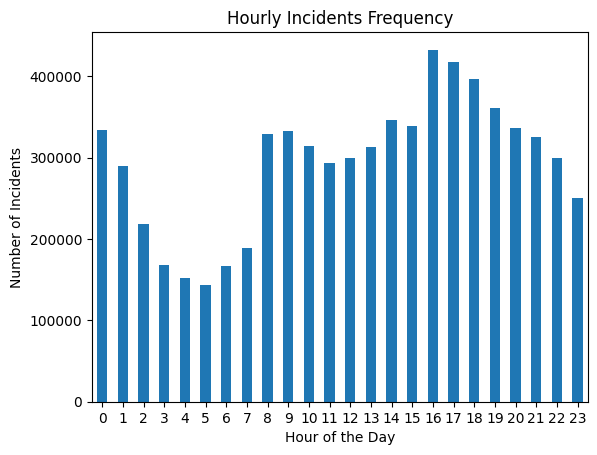

In [ ]:
import matplotlib.pyplot as plt
hourly_counts = data.groupby('INCIDENT_HOUR').count()['TYP_DESC']  # Replace 'incident_column' with the specific column that denotes an incident

hourly_counts.plot(kind='bar')
plt.title('Hourly Incidents Frequency')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Convert 'INCIDENT_DATE' and 'INCIDENT_TIME' to datetime format
data['INCIDENT_DATETIME'] = pd.to_datetime(data['INCIDENT_DATE'] + ' ' + data['INCIDENT_TIME'])

# Set the new datetime column as the index
data.set_index('INCIDENT_DATETIME', inplace=True)

# Aggregate data by counting the number of incidents each hour
hourly_incidents = data.resample('H').size()

hourly_incidents.head()


INCIDENT_DATETIME
2022-12-31 23:00:00       6
2023-01-01 00:00:00     910
2023-01-01 01:00:00    1043
2023-01-01 02:00:00     790
2023-01-01 03:00:00     684
Freq: H, dtype: int64

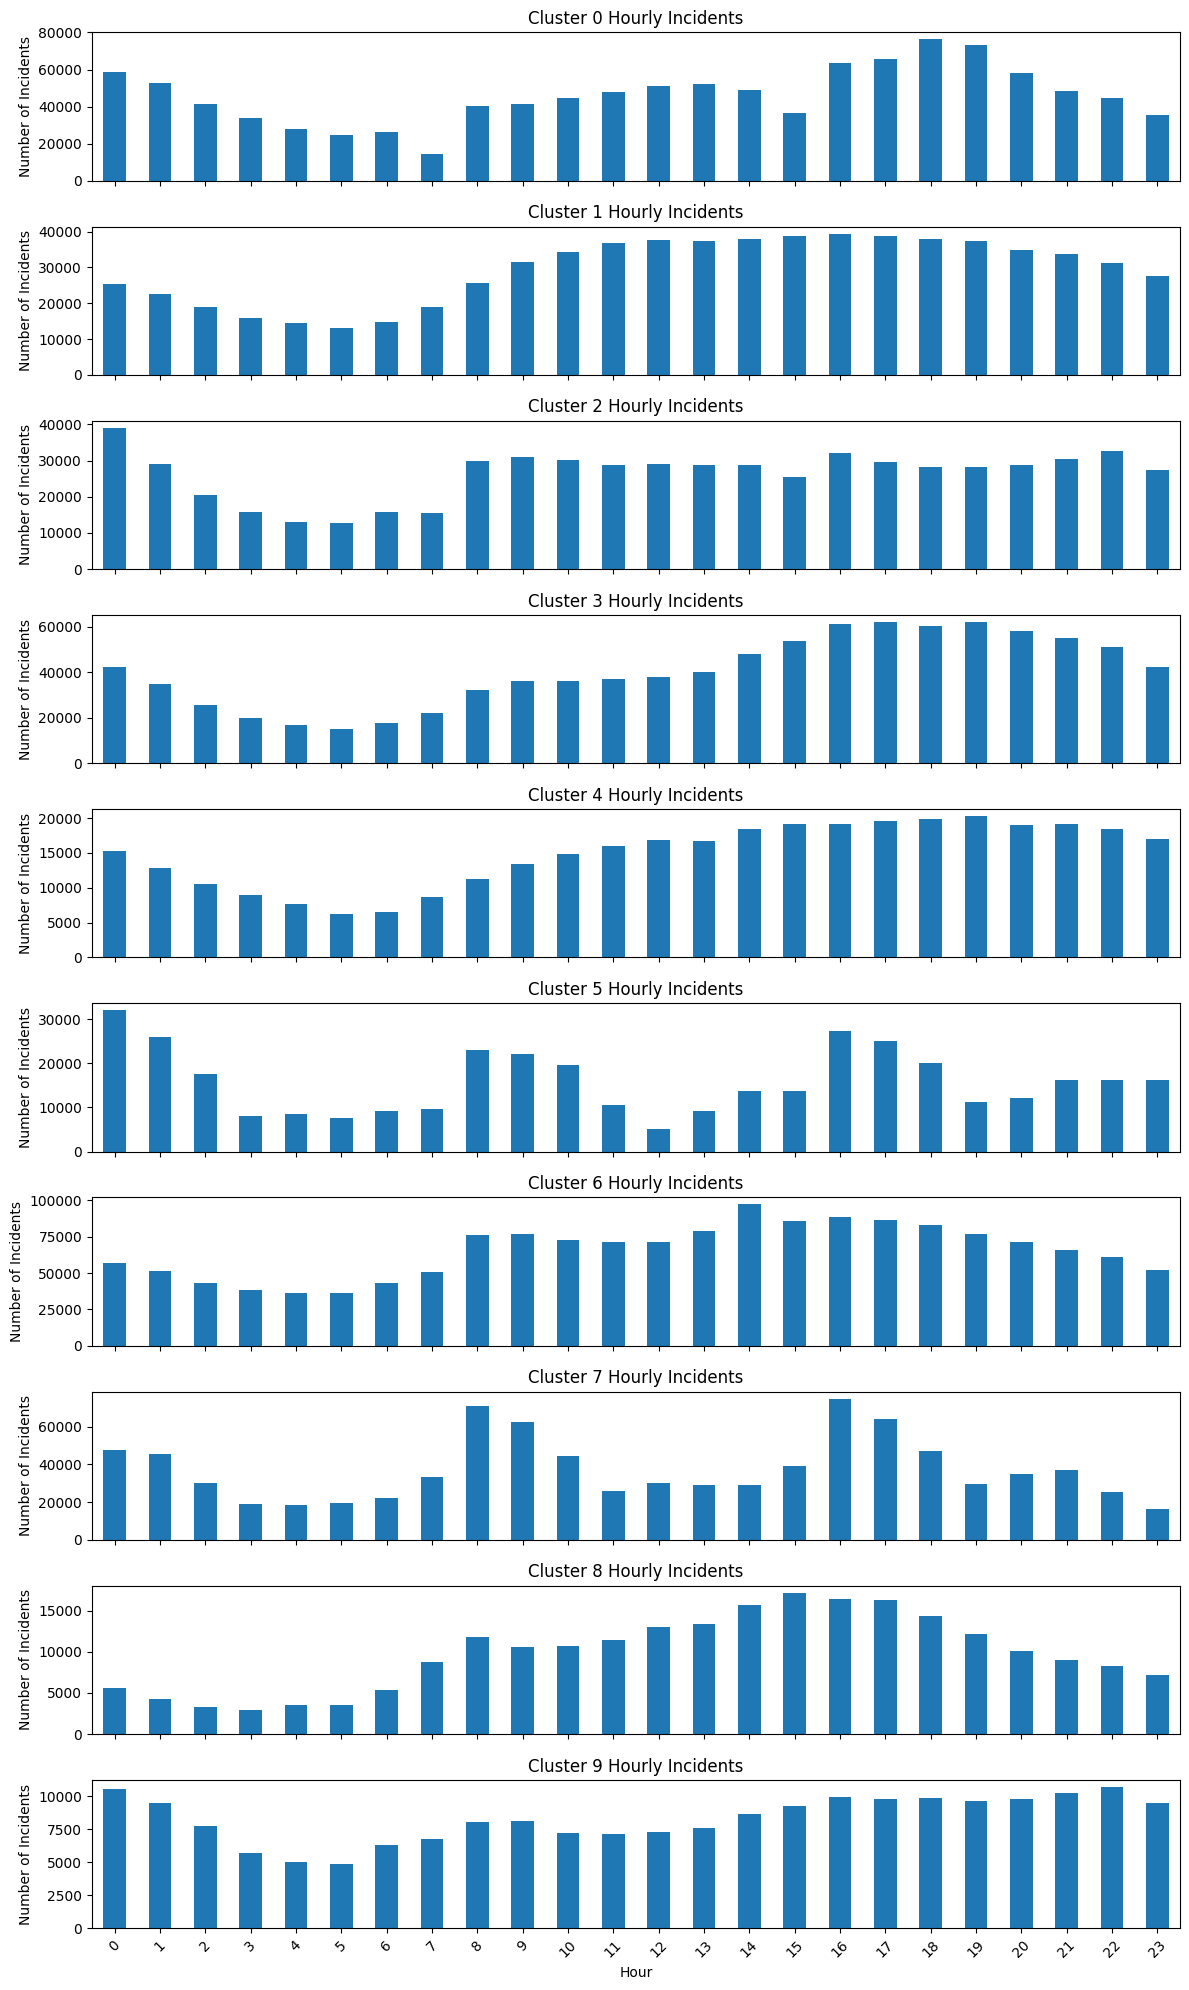

In [ ]:
'''
# Group by both hour and cluster, and count the number of incidents
cluster_hourly_incidents = data.groupby(['Cluster', 'INCIDENT_HOUR']).size().unstack(level=-1, fill_value=0)

# Plotting the incidents by cluster for each hour
fig, axes = plt.subplots(nrows=cluster_hourly_incidents.shape[0], figsize=(12, 20), sharex=True)

for (cluster, data), ax in zip(cluster_hourly_incidents.iterrows(), axes):
    data.plot(kind='bar', ax=ax, title=f'Cluster {cluster} Hourly Incidents')
    ax.set_ylabel('Number of Incidents')

plt.xlabel('Hour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''

<Figure size 1200x600 with 0 Axes>

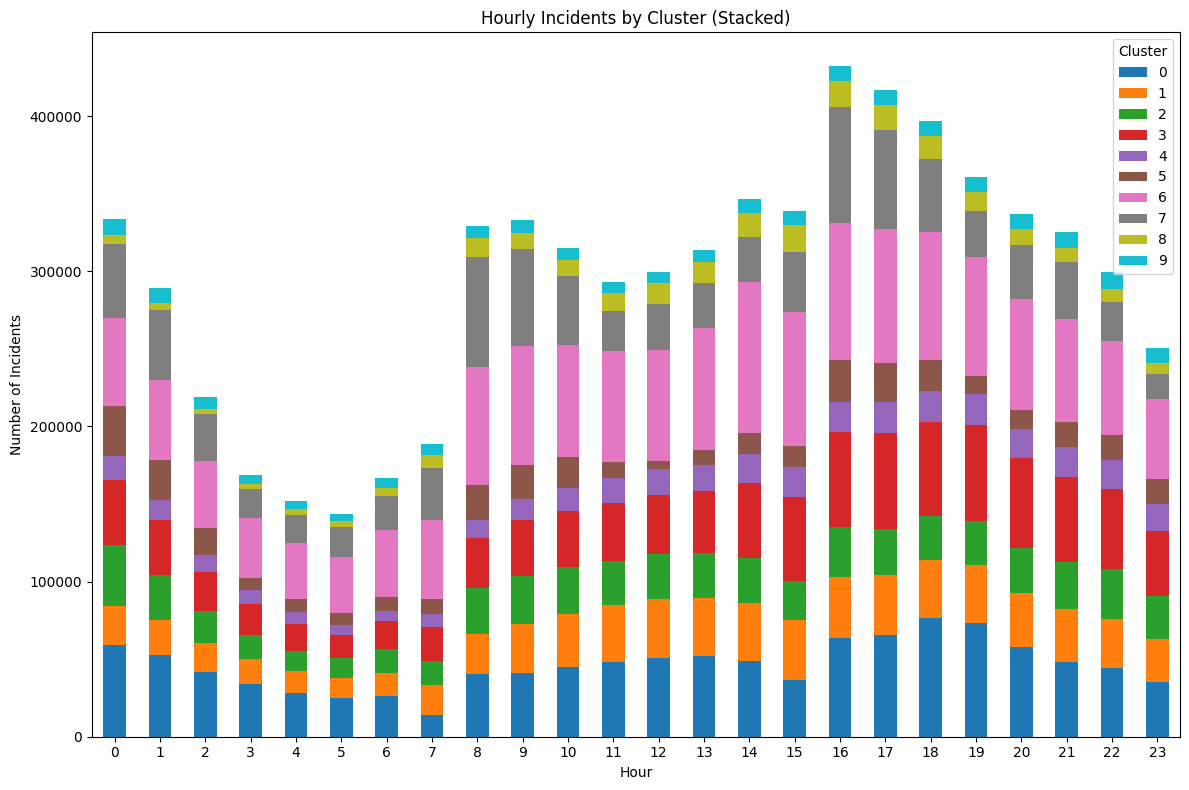

In [ ]:
# Plotting the hourly incidents by cluster with stacked bars
plt.figure(figsize=(12, 6))
cluster_hourly_incidents = data.groupby(['Cluster', 'INCIDENT_HOUR']).size().unstack(level=-1, fill_value=0)
cluster_hourly_incidents.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Hourly Incidents by Cluster (Stacked)')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test to check stationarity
adf_test = adfuller(hourly_incidents)

# Output the result
adf_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}

adf_results


{'ADF Statistic': -7.444180729401889,
 'p-value': 5.897601646918341e-11,
 'Critical Values': {'1%': -3.431099882538333,
  '5%': -2.8618713981324873,
  '10%': -2.56694639826003}}

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define model
model = SARIMAX(hourly_counts, order=(1, 0, 1), seasonal_order=(1, 0, 1, 24))
results = model.fit()
forecast_result = results.get_forecast(steps=24)
forecast_values = forecast_result.predicted_mean

# Display model summary
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                           TYP_DESC   No. Observations:                   24
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood                -292.290
Date:                            Tue, 07 May 2024   AIC                            594.581
Time:                                    13:35:54   BIC                            600.471
Sample:                                         0   HQIC                           596.144
                                             - 24                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9740      0.128      7.592      0.000       0.723       1.225
ma.L1          0.2270      0.358   

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Forecast values from the model
# sarima_forecast = model.get_forecast(steps=24)
# forecast_values = sarima_forecast.predicted_mean

# Actual values (assuming these are the last 24 values in your dataset)
actual_values = hourly_incidents[-24:]  # Adjust if actual forecast period data is different

# Calculating the metrics
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100
smape = 100 * (2.0 * np.abs(forecast_values - actual_values) / (np.abs(actual_values) + np.abs(forecast_values))).mean()

# Display the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Symmetric Mean Absolute Percentage Error (sMAPE): {smape:.2f}%")


Mean Absolute Error (MAE): 204361.03
Root Mean Squared Error (RMSE): 205007.02
Mean Absolute Percentage Error (MAPE): nan%
Symmetric Mean Absolute Percentage Error (sMAPE): nan%


<ipython-input-21-3f54983e2884>:15: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100


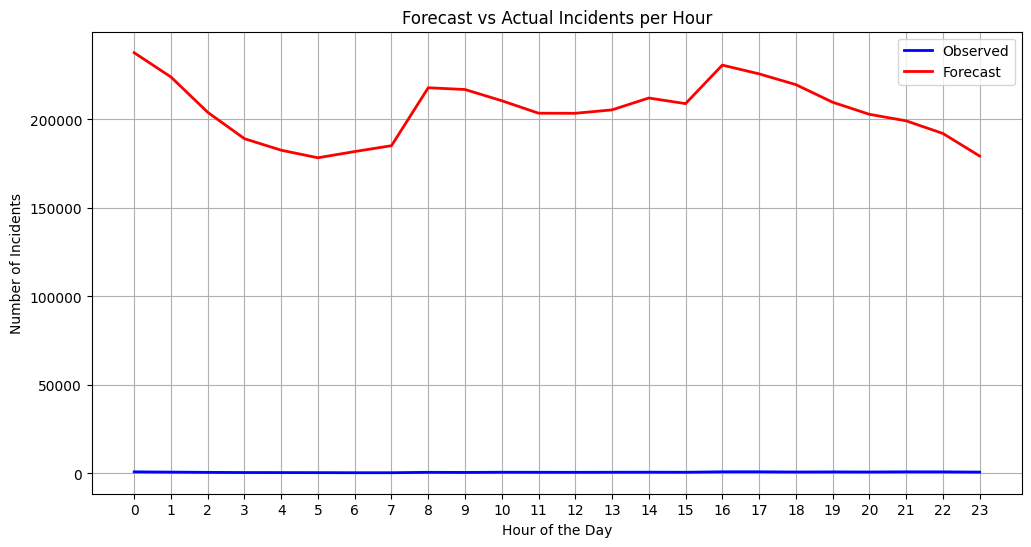

In [ ]:

# Create a plot for the forecast vs actual data using the newly generated forecast
plt.figure(figsize=(12, 6))
plt.plot(actual_values.index.hour, actual_values.values, label='Observed', color='blue', linewidth=2)
plt.plot(range(24), forecast_values, label='Forecast', color='red', linewidth=2)
plt.title('Forecast vs Actual Incidents per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.xticks(range(0, 24))  # Ensure labels represent each hour
plt.legend()
plt.grid(True)
plt.show()
